- https://github.com/oreilly-japan/deep-learning-from-scratch/tree/master/ch03

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size, batch_size, np.log(y), t * np.log(y)

In [4]:
y = np.array([[0.1, 0.2, 0.6], [0.1, 0.2, 0.6]])
t = np.array([[0, 1, 0], [0, 0, 1]])

In [5]:
cross_entropy_error(y, t)

(1.0601317681000455, 2, array([[-2.30258509, -1.60943791, -0.51082562],
        [-2.30258509, -1.60943791, -0.51082562]]), array([[-0.        , -1.60943791, -0.        ],
        [-0.        , -0.        , -0.51082562]]))

In [6]:
# 数値微分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def numerical_diff_front(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x)) / (h)

In [7]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

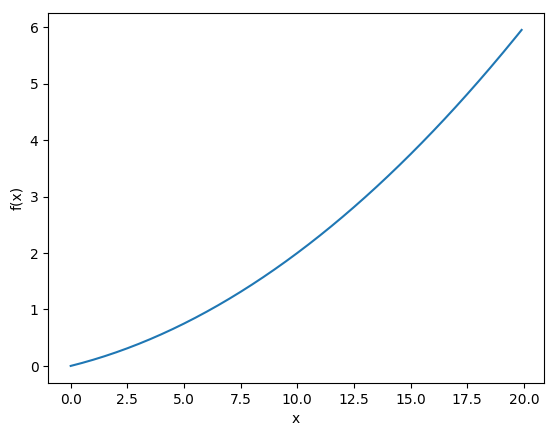

In [8]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

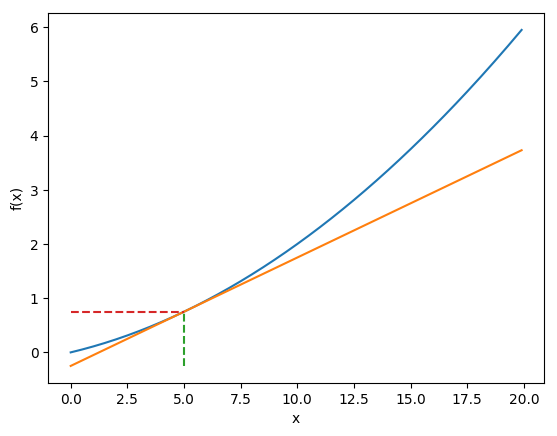

In [9]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)

x_1 = 5
a = numerical_diff(function_1, x_1)
b = function_1(x_1) - a*x_1
plt.plot(x, a*x+b)

plt.plot( [x_1,x_1],[b, function_1(x_1)], '--') # 破線
plt.plot( [0,x_1],[function_1(x_1), function_1(x_1)], '--') # 破線

plt.show()

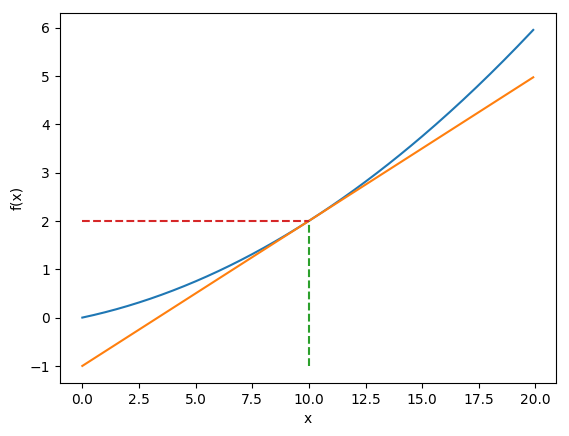

In [10]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)

x_1 = 10
a = numerical_diff(function_1, x_1)
b = function_1(x_1) - a*x_1
plt.plot(x, a*x+b)

plt.plot( [x_1,x_1],[b, function_1(x_1)], '--') # 破線
plt.plot( [0,x_1],[function_1(x_1), function_1(x_1)], '--') # 破線

plt.show()

In [11]:
numerical_diff(function_1, 5)

0.1999999999990898

In [12]:
numerical_diff(function_1, 10)

0.2999999999986347

In [13]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d

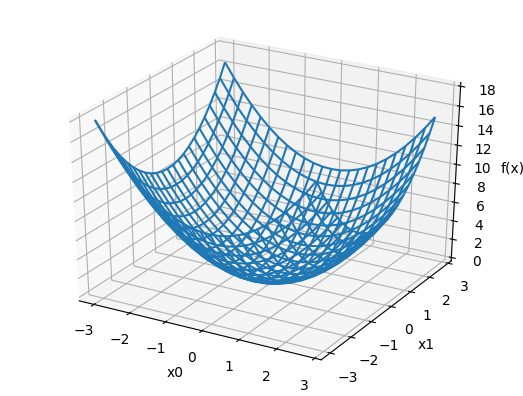

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = []
x_in = np.arange(-3,3,0.25)
x0, x1 = np.meshgrid(x_in, x_in)

x.append(x0)
x.append(x1)

fx = function_2(x)

ax.plot_wireframe(x[0], x[1], fx)
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x)")
plt.show()

In [16]:
#x0, x1

In [17]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [18]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [19]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [20]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

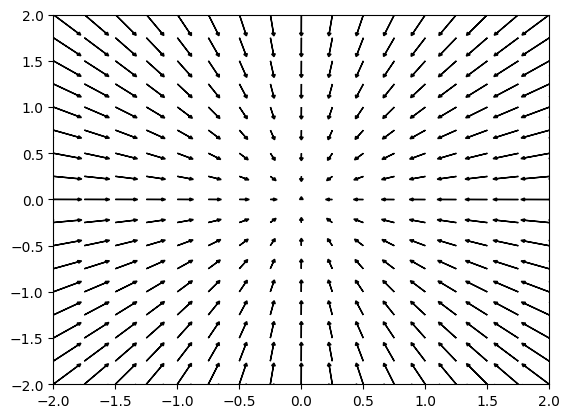

In [21]:
ax = plt.axes()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
for idx in range(x[0].flatten().size):
    x0 = x[0].flatten()[idx]
    x1 = x[1].flatten()[idx]
    #print(numerical_gradient(function_2, np.array([x0, x1])))
    grad = numerical_gradient(function_2, np.array([x0, x1])) * 0.05
    ax.arrow(x0,x1, -grad[0],-grad[1], head_width=0.03, head_length=0.03, fc='k', ec='k')

plt.show()

In [22]:
# 勾配降下法

In [23]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    # plot
    ax = plt.axes()

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        ax.scatter(x[0], x[1]) # plot
    return x

In [24]:
def function_2(x):
    return x[0]**2 + x[1]**2

array([ -6.11110793e-10,   8.14814391e-10])

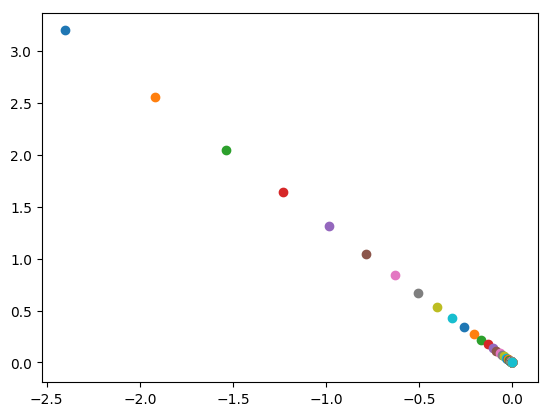

In [25]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

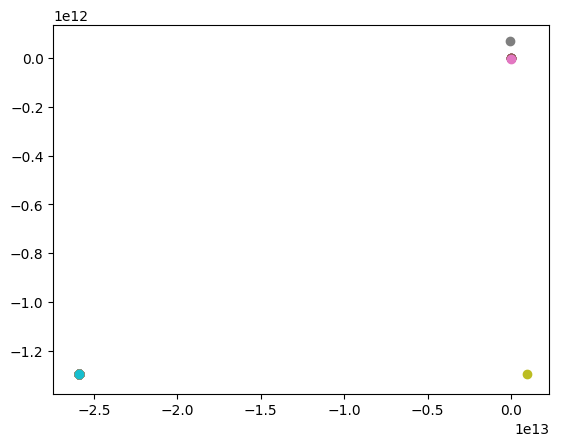

In [26]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.99999994,  3.99999992])

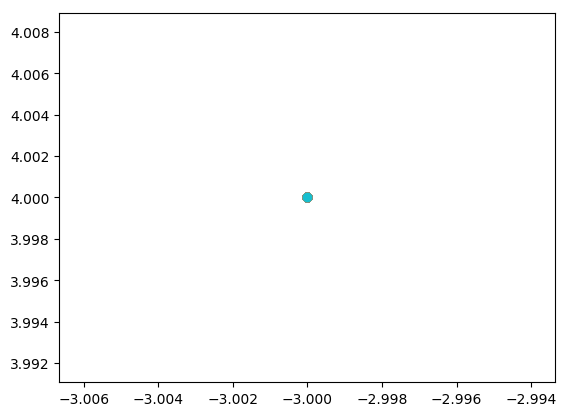

In [27]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) # 学習率が小さい

In [28]:
import os, sys
import numpy as np

sys.path.append(os.getcwd()+"/common")

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [29]:
net = simpleNet()

In [30]:
print(net.W)

[[-0.32112478  0.2379204  -0.03063358]
 [-0.22338011  0.99680493 -1.24014062]]


In [31]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.39371697  1.03987668 -1.13450671]


In [32]:
np.argmax(p)

1

In [33]:
t = np.array([0,0,1])

In [34]:
net.loss(x, t)

2.4760635548799024

In [49]:
def f(W):
    return net.loss(x, t)

In [53]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10581114  0.44374474 -0.54955588]
 [ 0.15871672  0.66561711 -0.82433383]]


In [46]:
f = lambda w : net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.10581114,  0.44374474, -0.54955588],
       [ 0.15871672,  0.66561711, -0.82433383]])

In [44]:
net.loss(x, t)

2.4760635548799024

array([-0.32112478,  0.2379204 , -0.03063358])

In [159]:
import sys, os
sys.path.append(os.getcwd()+"/common")

from common.functions import softmax, sigmoid, cross_entropy_error, sigmoid_grad
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t)/ float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        grads = {}
        """
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        """
        grads["W1"] = gradient(loss_W, self.params["W1"])
        grads["b1"] = gradient(loss_W, self.params["b1"])
        grads["W2"] = gradient(loss_W, self.params["W2"])
        grads["b2"] = gradient(loss_W, self.params["b2"])

        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        """
        print(" print(a1.shape, z1.shape, a2.shape, y.shape, t.shape, batch_num) ")
        print(a1.shape, z1.shape, a2.shape, y.shape, t.shape, batch_num)
        """
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [153]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params["W1"].shape

(784, 100)

In [144]:
net.params["b1"].shape

(100,)

In [91]:
net.params["W2"].shape

(100, 10)

In [92]:
net.params["b2"].shape

(10,)

In [93]:
x = np.random.rand(100, 784)
x.shape

(100, 784)

In [74]:
y = net.predict(x)

In [75]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

In [76]:
grads = net.numerical_gradient(x,t)

In [77]:
grads["W1"]

array([[ -2.60217181e-06,   5.60505553e-05,  -1.46224111e-04, ...,
         -9.12527076e-05,   1.51777007e-04,   3.88990773e-05],
       [ -5.33481082e-05,  -3.58117425e-05,   9.03148001e-06, ...,
         -1.49288799e-04,   1.45831094e-04,   2.76390555e-05],
       [ -7.87874099e-05,   7.90483612e-05,  -2.00132610e-04, ...,
         -1.92360090e-04,   4.58126825e-05,  -1.37062628e-05],
       ..., 
       [  1.21037647e-05,   5.30182898e-05,  -1.13424841e-04, ...,
         -9.13054632e-05,   6.62725430e-06,   8.48525694e-07],
       [ -4.61239735e-05,   9.05022146e-05,  -1.50603181e-04, ...,
         -4.77807172e-05,  -4.61578042e-05,   4.25089364e-05],
       [ -5.15852294e-05,  -6.82260626e-05,   9.87793203e-05, ...,
         -4.45567783e-05,   4.54331328e-05,   4.49026727e-05]])

In [79]:
grads["b1"]

array([ -9.78468440e-05,   1.41493075e-04,  -2.08089026e-04,
         2.41255307e-04,   3.26591796e-04,   2.90682158e-04,
         3.30336216e-04,   3.12894171e-04,   1.62042326e-04,
         5.80917514e-05,   2.50346728e-04,  -1.18406762e-04,
         2.47790770e-04,  -7.86211651e-05,   9.17534715e-05,
         1.65332814e-04,   1.52441040e-04,  -6.48424692e-05,
        -6.73702094e-05,   1.99339480e-04,  -2.01493067e-05,
         1.08414584e-04,   7.23043847e-05,  -1.41630307e-05,
         3.20761928e-05,   9.13372356e-05,  -4.05770040e-05,
         2.58284232e-04,  -3.56115337e-05,  -1.52043038e-04,
         5.03125319e-06,   1.66296690e-04,  -3.24774676e-04,
        -4.22722968e-06,   1.75951478e-04,   1.72170513e-04,
         1.12513416e-04,   1.49868771e-04,   3.78840115e-05,
         1.07534586e-04,  -1.02022033e-04,  -3.64680508e-05,
         1.52506889e-04,  -4.20406552e-04,   2.09044115e-06,
        -4.91440000e-05,  -1.13846490e-04,  -2.58468069e-04,
        -1.15415599e-04,

In [78]:
grads["W2"]

array([[  1.17495873e-02,   5.35128083e-03,  -1.14878260e-02,
         -1.07604671e-02,   1.51353470e-02,   1.24411930e-03,
         -9.44352399e-03,   1.05008877e-02,  -5.39876316e-03,
         -6.89064171e-03],
       [  1.31625066e-02,   4.75138885e-03,  -1.18607679e-02,
         -1.13038368e-02,   1.64347180e-02,   1.65458925e-03,
         -1.00860619e-02,   1.26920022e-02,  -6.72218700e-03,
         -8.72235111e-03],
       [  1.32315845e-02,   5.45542363e-03,  -1.39800743e-02,
         -1.16250924e-02,   1.69794693e-02,   1.68780549e-03,
         -1.04192646e-02,   1.31726815e-02,  -5.68356388e-03,
         -8.81896897e-03],
       [  1.23917478e-02,   5.39740054e-03,  -1.09312312e-02,
         -1.01216238e-02,   1.49316067e-02,   1.15377018e-03,
         -9.61590027e-03,   1.00649585e-02,  -5.73664224e-03,
         -7.53408611e-03],
       [  1.35657959e-02,   5.19490413e-03,  -1.16907865e-02,
         -1.30260373e-02,   1.64452823e-02,   2.00650160e-03,
         -1.05745883e-02

In [80]:
grads["b2"]

array([ 0.02632223,  0.01037033, -0.02404015, -0.02293981,  0.03222059,
        0.00263498, -0.02020594,  0.02345722, -0.01114878, -0.01667066])

In [83]:
time net.numerical_gradient(x,t) # 初期値を元に勾配を計算

CPU times: user 5min 29s, sys: 1.27 s, total: 5min 30s
Wall time: 5min 36s


{'W1': array([[ -2.60217181e-06,   5.60505553e-05,  -1.46224111e-04, ...,
          -9.12527076e-05,   1.51777007e-04,   3.88990773e-05],
        [ -5.33481082e-05,  -3.58117425e-05,   9.03148001e-06, ...,
          -1.49288799e-04,   1.45831094e-04,   2.76390555e-05],
        [ -7.87874099e-05,   7.90483612e-05,  -2.00132610e-04, ...,
          -1.92360090e-04,   4.58126825e-05,  -1.37062628e-05],
        ..., 
        [  1.21037647e-05,   5.30182898e-05,  -1.13424841e-04, ...,
          -9.13054632e-05,   6.62725430e-06,   8.48525694e-07],
        [ -4.61239735e-05,   9.05022146e-05,  -1.50603181e-04, ...,
          -4.77807172e-05,  -4.61578042e-05,   4.25089364e-05],
        [ -5.15852294e-05,  -6.82260626e-05,   9.87793203e-05, ...,
          -4.45567783e-05,   4.54331328e-05,   4.49026727e-05]]),
 'W2': array([[  1.17495873e-02,   5.35128083e-03,  -1.14878260e-02,
          -1.07604671e-02,   1.51353470e-02,   1.24411930e-03,
          -9.44352399e-03,   1.05008877e-02,  -5.39876

In [96]:
grads["W1"]

array([[ -2.60217181e-06,   5.60505553e-05,  -1.46224111e-04, ...,
         -9.12527076e-05,   1.51777007e-04,   3.88990773e-05],
       [ -5.33481082e-05,  -3.58117425e-05,   9.03148001e-06, ...,
         -1.49288799e-04,   1.45831094e-04,   2.76390555e-05],
       [ -7.87874099e-05,   7.90483612e-05,  -2.00132610e-04, ...,
         -1.92360090e-04,   4.58126825e-05,  -1.37062628e-05],
       ..., 
       [  1.21037647e-05,   5.30182898e-05,  -1.13424841e-04, ...,
         -9.13054632e-05,   6.62725430e-06,   8.48525694e-07],
       [ -4.61239735e-05,   9.05022146e-05,  -1.50603181e-04, ...,
         -4.77807172e-05,  -4.61578042e-05,   4.25089364e-05],
       [ -5.15852294e-05,  -6.82260626e-05,   9.87793203e-05, ...,
         -4.45567783e-05,   4.54331328e-05,   4.49026727e-05]])

In [98]:
# p.120
# ミニバッチ学習

In [161]:
import numpy as np
from mnist import load_mnist
# twolayernet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

train_size = x_train.shape[0]

iters_num = 10000
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
        
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
         
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.797383333333, 0.7998
train acc, test acc | 0.878383333333, 0.8837
train acc, test acc | 0.898716666667, 0.8993
train acc, test acc | 0.909016666667, 0.9113
train acc, test acc | 0.913316666667, 0.9148
train acc, test acc | 0.920416666667, 0.9212
train acc, test acc | 0.924516666667, 0.9248
train acc, test acc | 0.927416666667, 0.9274
train acc, test acc | 0.931233333333, 0.9308
train acc, test acc | 0.93355, 0.9339
train acc, test acc | 0.935866666667, 0.9345
train acc, test acc | 0.939066666667, 0.9391
train acc, test acc | 0.94185, 0.9394
train acc, test acc | 0.9437, 0.942
train acc, test acc | 0.944983333333, 0.9436
train acc, test acc | 0.946933333333, 0.9447


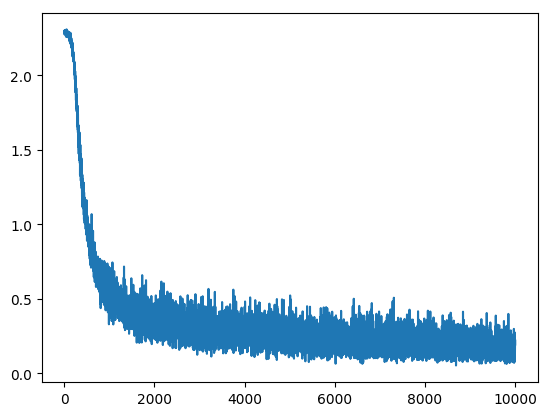

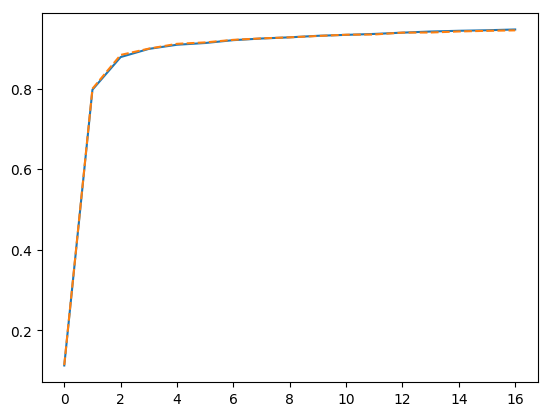

In [168]:
plt.plot(train_loss_list)
plt.show()
plt.plot(train_acc_list)
plt.plot(test_acc_list, '--')